### Name - Bolonghe B.P.M
### Index No - 190095C
### GitHub repository - https://github.com/Pasindu-Manodara/Image-Processing-Home-Work-Exercise.git

#### Hough Transform
#### Question 1

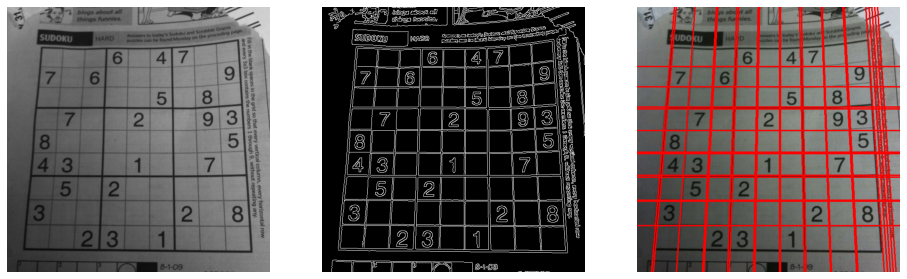

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = cv.imread(r'./Images/sudoku.png',cv.IMREAD_COLOR)
assert im is not None

gray =cv.cvtColor(im,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,30,120,apertureSize=3)
lines = cv.HoughLines(edges,1,np.pi/180,200)

for line in lines:
    rho,theta=line[0]
    a=np.cos(theta)
    b=np.sin(theta)
    x0,y0=a*rho,b*rho
    x1,y1=int(x0+1000*(-b)),int(y0+1000*(a))
    x2,y2=int(x0-1000*(-b)),int(y0-1000*(a))
    cv.line(im,(x1,y1),(x2,y2),(0,0,255),2)

fig,ax = plt.subplots(1,3,figsize=(16,14))
ax[0].imshow(cv.cvtColor(gray,cv.COLOR_GRAY2RGB))
ax[1].imshow(cv.cvtColor(edges,cv.COLOR_GRAY2RGB))
ax[2].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))

for i in range(3):
    ax[i].axis('off')

#### Question 2

(-0.5, 499.5, 347.5, -0.5)

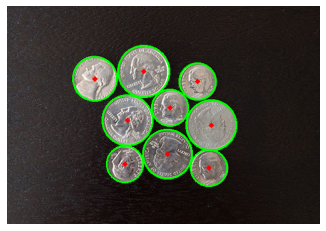

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'./Images/coins.jpg',cv.IMREAD_COLOR)
assert img is not None

gray =cv.cvtColor(img,cv.COLOR_BGR2GRAY)



circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,60,param1=50,param2=70,minRadius=20,maxRadius=50)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(img,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
plt.axis('off')

#### Question 3

x=29.0,y=109.0,scale=1.0,orientation=0.0,p1=(4, 76),p2=(54, 141)


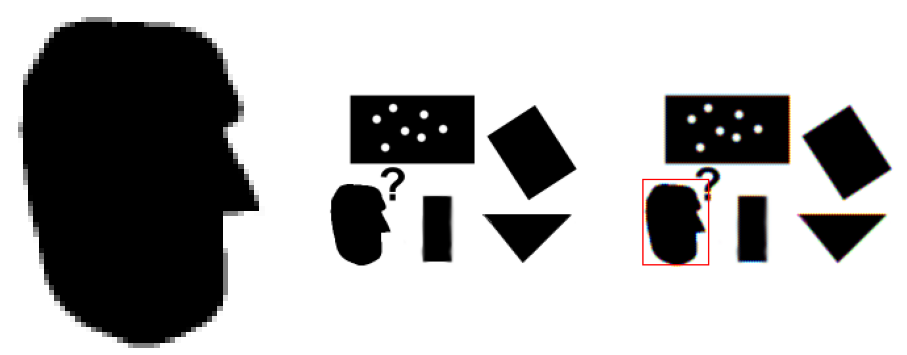

In [13]:
import cv2 as cv
import numpy as np

im=cv.imread(r'./Images/pic1.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
templ=cv.imread(r'./Images/templ.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert templ is not None

im_edges = cv.Canny(im,50,250)
templ_edges = cv.Canny(templ,50,250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(0.1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(im,cv.COLOR_BAYER_BG2BGR)
for x, y ,scale, orientation in positions[0]:
    halfHeight = templ.shape[0]/2*scale
    halfWidth = templ.shape[1]/2*scale
    p1=(int(x-halfWidth),int(y-halfHeight))
    p2=(int(x+halfWidth),int(y+halfHeight))
    print("x={},y={},scale={},orientation={},p1={},p2={}".format(x,y,scale,orientation,p1,p2))
    cv.rectangle(out,p1,p2,(0,0,255))


fig,ax = plt.subplots(1,3,figsize=(16,14))
ax[0].imshow(cv.cvtColor(templ,cv.COLOR_GRAY2RGB))
ax[1].imshow(cv.cvtColor(im,cv.COLOR_GRAY2RGB))
ax[2].imshow(cv.cvtColor(out,cv.COLOR_BGR2RGB))

for i in range(3):
    ax[i].axis('off')
    

### Alignment
#### Question 4

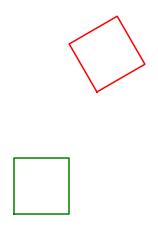

In [14]:
import matplotlib.pyplot as plt
import numpy as np

a, b, c, d = [0,0,1],[0,1,1],[1,1,1],[1,0,1]
X = np.array([a,b,c,d]).T

theta =np.pi*30/180
s=1
tx,ty = 1.5,2.2
H=np.array([[s*np.cos(theta),-s*np.sin(theta),tx],[s*np.sin(theta),s*np.cos(theta),ty],[0,0,1]])
Y = H @ X
#a11,a12,a21,a22 = 0.8,1.2,0.7,1.5
#A = np.array([[a11,a12,tx],[a21,a22,ty],[0,0,1]])


x=np.append(X[0,:],X[0,0])
y =np.append(X[1,:],X[1,0])

fig,ax =plt.subplots(1,1)
ax.plot(x,y,color='g')
ax.set_aspect('equal')

x=np.append(Y[0,:],Y[0,0])
y =np.append(Y[1,:],Y[1,0])

#fig,ax =plt.subplots(1,1)
ax.plot(x,y,color='r')
ax.set_aspect('equal')
ax.axis('off')
plt.show()


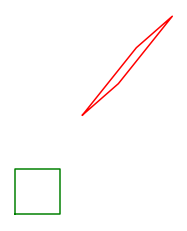

In [15]:
import matplotlib.pyplot as plt
import numpy as np

a, b, c, d = [0,0,1],[0,1,1],[1,1,1],[1,0,1]
X = np.array([a,b,c,d]).T

theta =np.pi*30/180
s=1
tx,ty = 1.5,2.2
#H=np.array([[s*np.cos(theta),-s*np.sin(theta),tx],[s*np.sin(theta),s*np.cos(theta),ty],[0,0,1]])
#Y = H @ X
a11,a12,a21,a22 = 0.8,1.2,0.7,1.5
A = np.array([[a11,a12,tx],[a21,a22,ty],[0,0,1]])
Y = A @ X

x=np.append(X[0,:],X[0,0])
y =np.append(X[1,:],X[1,0])

fig,ax =plt.subplots(1,1)
ax.plot(x,y,color='g')
ax.set_aspect('equal')

x=np.append(Y[0,:],Y[0,0])
y =np.append(Y[1,:],Y[1,0])

#fig,ax =plt.subplots(1,1)
ax.plot(x,y,color='r')
ax.set_aspect('equal')
ax.axis('off')
plt.show()


### Question 5

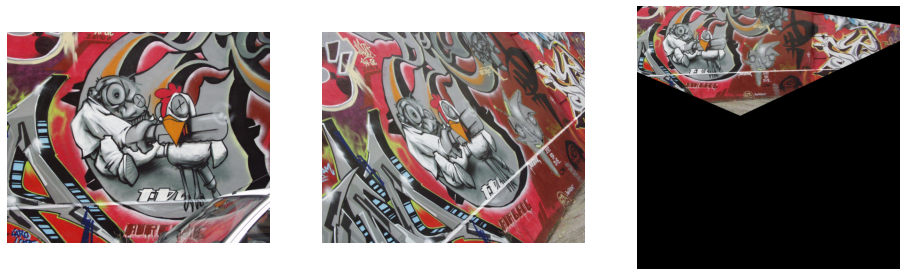

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread(r'./Images/img1.ppm',cv.IMREAD_ANYCOLOR)
im4 = cv.imread(r'./Images/img4.ppm',cv.IMREAD_ANYCOLOR)
assert im1 is not None
H = np.array([[   6.6378505e-01 ,  6.8003334e-01 , -3.1230335e+01],
  [-1.4495500e-01 ,  9.7128304e-01 ,  1.4877420e+02],
  [ 4.2518504e-04 , -1.3930359e-05 ,  1.0000000e+00]])

im1to4 = cv.warpPerspective(im4,np.linalg.inv(H),(2000,2000))

fig, ax = plt.subplots(1,3,figsize = (16,14))
ax[0].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im4,cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(im1to4,cv.COLOR_BGR2RGB))

for i in range(3):
    ax[i].axis('off')